# Clean and Read Data

In [1]:
import pandas as pd

# Define original column names
column_names = [
    "LOAN SEQUENCE NUMBER", "MONTHLY REPORTING PERIOD", "CURRENT ACTUAL UPB", 
    "CURRENT LOAN DELINQUENCY STATUS", "LOAN AGE", "REMAINING MONTHS TO LEGAL MATURITY",
    "DEFECT SETTLEMENT DATE", "MODIFICATION FLAG", "ZERO BALANCE CODE", 
    "ZERO BALANCE EFFECTIVE DATE", "CURRENT INTEREST RATE", "CURRENT DEFERRED UPB",
    "DUE DATE OF LAST PAID INSTALLMENT(DDLPI)", "MI RECOVERIES", "NET SALE PROCEEDS", 
    "NON MI RECOVERIES", "EXPENSES", "LEGAL COSTS", "MAINTENANCE AND PRESERVATION COSTS", 
    "TAXES AND INSURANCE", "MISCELLANEOUS EXPENSES", "ACTUAL LOSS CALCULATION", 
    "MODIFICATION COST", "STEP MODIFICATION FLAG","DEFERRED PAYMENT PLAN", 
    "ESTIMATED LOAN TO VALUE (ELTV)", "ZERO BALANCE REMOVAL UPB", "DELINQUENT ACCRUED INTEREST", 
    "DELINQUENCY DUE TO DISASTER","BORROWER ASSISTANCE STATUS CODE", "CURRENT MONTH MODIFICATION COST",
    "INTEREST BEARING UPB"
]


def load_cleaned_loan_data(file_path):
    """Load and clean a monthly loan performance file."""
    df = pd.read_csv(file_path, sep="|", names=column_names, dtype=str)
    df.columns = df.columns.str.capitalize()
    df.dropna(axis=1, how='all', inplace=True)  # Drop fully empty columns
    return df

# Load datasets
data_2008 = load_cleaned_loan_data("Data_File/Monthly_Performance_Data_File_2008.txt")
data_2020 = load_cleaned_loan_data("Data_File/Monthly_Performance_Data_File_2020.txt")
data_2022 = load_cleaned_loan_data("Data_File/Monthly_Performance_Data_File_2022.txt")

# Preview
data_2008.head(10)


,Loan sequence number,Monthly reporting period,Current actual upb,Current loan delinquency status,Loan age,Remaining months to legal maturity,Defect settlement date,Modification flag,Zero balance code,Zero balance effective date,...,Modification cost,Step modification flag,Deferred payment plan,Estimated loan to value (eltv),Zero balance removal upb,Delinquent accrued interest,Delinquency due to disaster,Borrower assistance status code,Current month modification cost,Interest bearing upb
0,F08Q10000071,200802,58000.00,0,000,360,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58000.00
1,F08Q10000071,200803,58000.00,0,001,359,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58000.00
2,F08Q10000071,200804,58000.00,0,002,358,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58000.00
3,F08Q10000071,200805,57000.00,0,003,357,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,57000.00
4,F08Q10000071,200806,57000.00,0,004,356,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,57000.00
5,F08Q10000071,200807,57000.00,0,005,355,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,57000.00
6,F08Q10000071,200808,57000.00,0,006,354,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,57000.00
7,F08Q10000071,200809,57246.88,0,007,353,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,57246.88
8,F08Q10000071,200810,57195.29,0,008,352,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,57195.29
9,F08Q10000071,200811,57143.41,0,009,351,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,57143.41


# Analyzing data 2008, 2020, 2022

### 1. Loan Status Analysis

Analyze the distribution of loan delinquency statuses and visualize it using a bar chart.

In [2]:
import matplotlib.pyplot as plt
import pandas as pd

def plot_and_export_delinquency(data, num_bars=14, y_limit_grouped=80000, y_limit_status=60000,
                                 export=True, file_name="loan_delinquency_summary", file_format="excel"):
    
    """
    Visualizes and optionally exports loan delinquency data.

    Creates grouped and detailed bar plots of loan delinquency status from a DataFrame, 
    and exports the summary to Excel or CSV.

    Parameters:
        data (pd.DataFrame): Data with 'Current loan delinquency status' column.
        num_bars (int): Number of top delinquency statuses to plot (default: 14).
        y_limit_grouped (int): Y-axis limit for grouped plot (default: 80000).
        y_limit_status (int): Y-axis limit for status plot (default: 60000).
        export (bool): If True, exports the summary data (default: True).
        file_name (str): Base name for export files (default: "loan_delinquency_summary").
        file_format (str): 'excel' or 'csv' (default: 'excel').

    Returns:
        None
    """
    # Ensure numeric delinquency values
    data['Current loan delinquency status'] = pd.to_numeric(data['Current loan delinquency status'], errors='coerce')

    # Step 1: Categorize for grouped plot
    def categorize_delinquency(status):
        if pd.isna(status):
            return 'Unknown'
        val = int(status)
        if val == 0:
            return 'Current(n=0)'
        elif 1 <= val <= 3:
            return 'Moderate(1≤n≤3)'
        elif val >= 4:
            return 'Severe(n≥4)'
        else:
            return 'Unknown'

    data['Delinquency Group'] = data['Current loan delinquency status'].apply(categorize_delinquency)
    grouped_counts = data['Delinquency Group'].value_counts().sort_index()
    grouped_df = grouped_counts.reset_index()
    grouped_df.columns = ['Delinquency Group', 'Loan Count']

    # Prepare fine-grained delinquency status distribution
    status_counts = data['Current loan delinquency status'].value_counts().sort_index()
    if num_bars > len(status_counts):
        num_bars = len(status_counts)
    status_df = status_counts.iloc[:num_bars].reset_index()
    status_df.columns = ['Delinquency Status', 'Count']

    # Plot side-by-side
    fig, axs = plt.subplots(1, 2, figsize=(16, 6))

    # Left: Grouped Bar Plot
    bars1 = axs[0].bar(grouped_counts.index, grouped_counts.values, color=['green', 'orange', 'red', 'gray'])
    axs[0].set_title('Loan Delinquency Distribution (Grouped)')
    axs[0].set_xlabel('Delinquency Group')
    axs[0].set_ylabel('Loan Count')
    axs[0].set_ylim(0, y_limit_grouped)
    for bar in bars1:
        height = bar.get_height()
        axs[0].annotate(f'{height}', xy=(bar.get_x() + bar.get_width()/2, height), xytext=(0, 3),
                        textcoords="offset points", ha='center', va='bottom')

    # Right: Status Bar Plot
    bars2 = axs[1].bar(status_df['Delinquency Status'], status_df['Count'], color='steelblue')
    axs[1].set_title('Distribution of Loan Delinquency Status')
    axs[1].set_xlabel('Loan Delinquency Status')
    axs[1].set_ylabel('Count')
    axs[1].set_ylim(0, y_limit_status)
    axs[1].set_xticks(status_df['Delinquency Status'])
    axs[1].set_xticklabels(status_df['Delinquency Status'])

    for bar in bars2:
        height = bar.get_height()
        axs[1].annotate(f'{height}', xy=(bar.get_x() + bar.get_width()/2, height), xytext=(0, 3),
                        textcoords="offset points", ha='center', va='bottom')

    plt.tight_layout()
    plt.show()

    # Export
    if export:
        if file_format.lower() == 'excel':
            with pd.ExcelWriter(f"{file_name}.xlsx") as writer:
                grouped_df.to_excel(writer, sheet_name='Grouped Summary', index=False)
                status_df.to_excel(writer, sheet_name='Status Distribution', index=False)
            print(f"✅ Data exported to {file_name}.xlsx with two sheets.")
        elif file_format.lower() == 'csv':
            grouped_df.to_csv(f"{file_name}_grouped.csv", index=False)
            status_df.to_csv(f"{file_name}_status.csv", index=False)
            print(f"✅ Data exported to {file_name}_grouped.csv and {file_name}_status.csv")
        else:
            print("❌ Unsupported file format. Use 'excel' or 'csv'.")


#### 1.1 Data of 2008

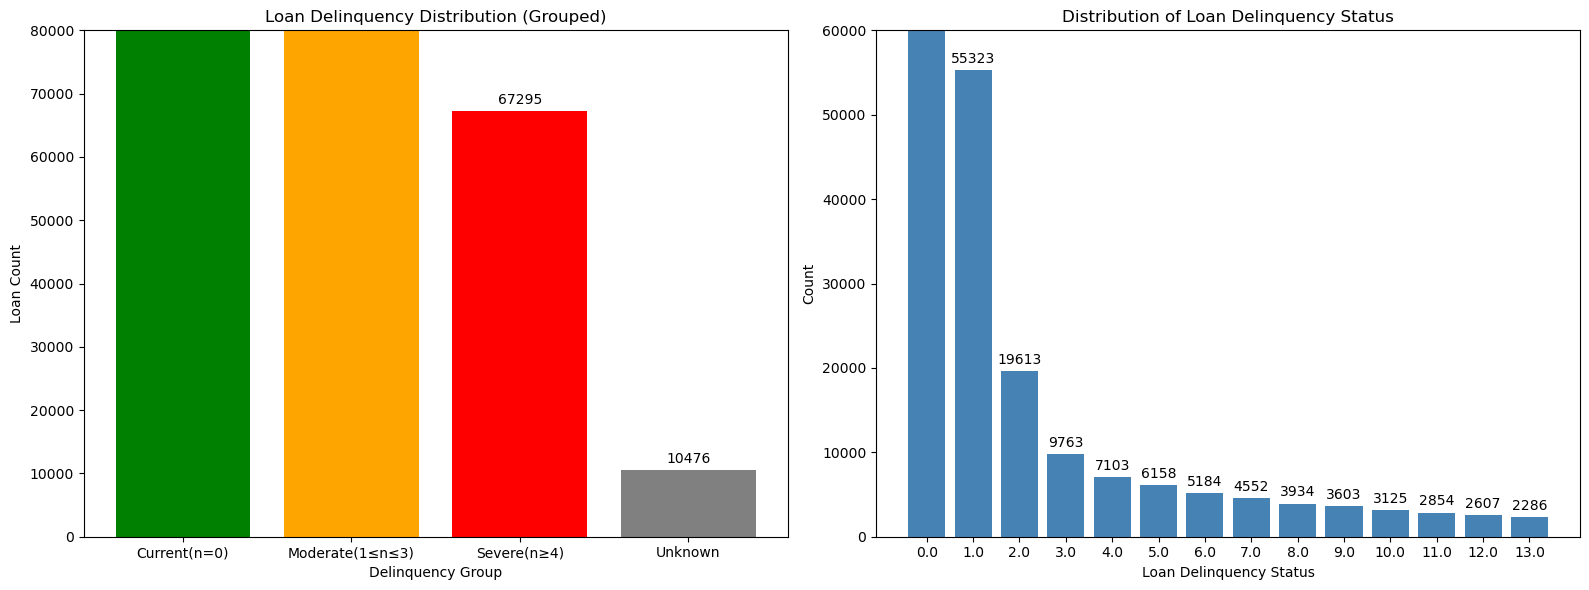

In [3]:
plot_and_export_delinquency(data_2008, num_bars=14, export=False, file_name='delinquency_2008', file_format='excel') 
# num_bars = 171

#### 1.2 Data of 2020

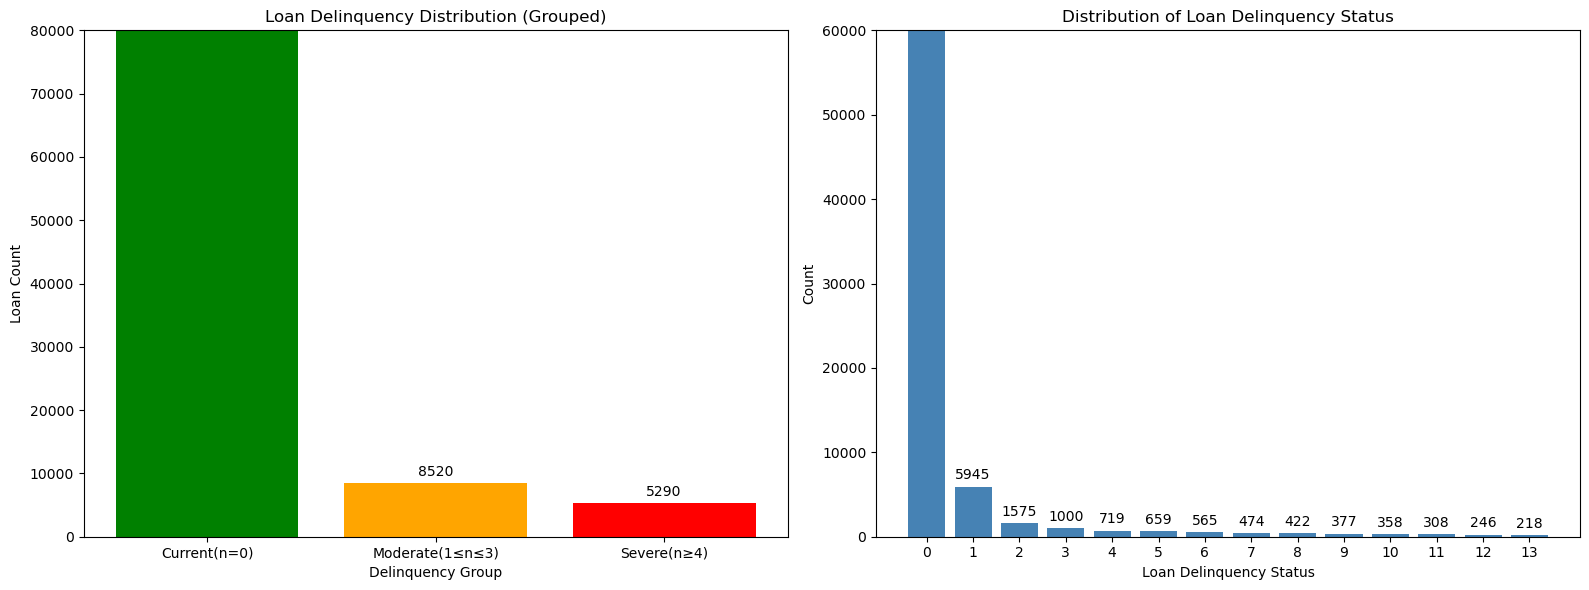

In [4]:
plot_and_export_delinquency(data_2020, num_bars=14, export=False, file_name='delinquency_2020', file_format='excel')
# num_bars=36


#### 1.3 Data of 2022

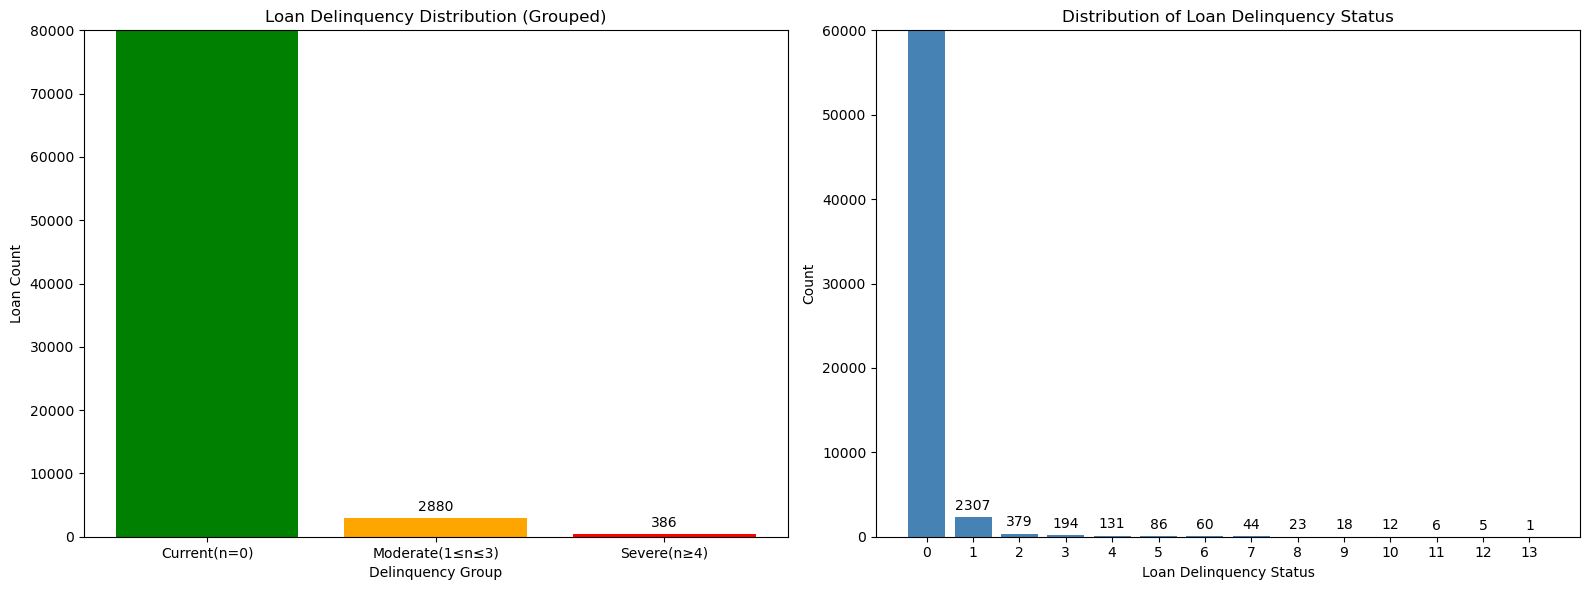

In [5]:
plot_and_export_delinquency(data_2022, num_bars=14, export=False, file_name='delinquency_2022', file_format='excel')
# num_bars=14

#### Summary

The loan delinquency statuses range from current or minor delays to more substantial delinquencies, with a significant portion of loans being in the "current" or "less than 30 days past due" category in all three dataset. 

The overall trend of the graph exhibits an exponential shape. In all three cases, the frequency of level 1 is much lower than half of level 0, which means most of the customers in 2020 and 2022 have a well loan paying habit each month. 

It is also shown that the data set of 2008 is much larger than others, this might reflect the popular mortgage-related financing product in 2008, and people are not as well in loan paying. 

### 2. Interest Rate Analysis

Visualize the distribution of current interest rates using a histogram.

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def plot_top_interest_rates(
    data,
    num_interest_rates=20,
    color='cornflowerblue',
    edge_color='gray',
    alpha=0.6,
    show_kde=True,
    show_boxplot=True
):
    """
    Plots interest rate distribution using bar chart (top N),
    and optionally shows KDE and boxplot.

    Parameters:
    - data: DataFrame containing 'Current interest rate'
    - num_interest_rates: Number of top interest rates to display in bar chart
    - color: Bar color
    - edge_color: Bar edge color
    - alpha: Transparency of bars
    - show_kde: Whether to show KDE plot
    - show_boxplot: Whether to show boxplot

    Returns:
        None
    """
    
    # Convert interest rate to numeric
    data['Current interest rate'] = pd.to_numeric(data['Current interest rate'], errors='coerce')
    interest_rates = data['Current interest rate'].dropna()

    # Calculate top N frequencies
    top_counts = interest_rates.value_counts().sort_values(ascending=False).head(num_interest_rates)
    x_coords = np.arange(len(top_counts))

    # Set up the figure with flexible layout
    n_rows = 1 + int(show_kde) + int(show_boxplot)
    plt.figure(figsize=(12, 4 * n_rows))

    plot_idx = 1

    # Bar Plot
    plt.subplot(n_rows, 1, plot_idx)
    plt.bar(x_coords, top_counts.values, color=color, edgecolor=edge_color, alpha=alpha)
    plt.xticks(x_coords, [f"{r:.2f}%" for r in top_counts.index], rotation=45)
    plt.ylabel("Frequency")
    plt.title(f"Top {num_interest_rates} Interest Rates by Frequency")
    for x, count in zip(x_coords, top_counts.values):
        plt.text(x, count + 5, str(int(count)), ha='center', va='bottom')
    plt.grid(axis='y', linestyle='--', alpha=0.6)
    plot_idx += 1

    # KDE Plot
    if show_kde:
        plt.subplot(n_rows, 1, plot_idx)
        sns.kdeplot(interest_rates, fill=True, color=color, alpha=0.4)
        plt.title("Interest Rate Distribution (KDE)")
        plt.xlabel("Interest Rate (%)")
        plt.ylabel("Density")
        plt.grid(True, linestyle='--', alpha=0.5)
        plot_idx += 1

    # Boxplot
    if show_boxplot:
        plt.subplot(n_rows, 1, plot_idx)
        sns.boxplot(x=interest_rates, color=color, fliersize=3)
        plt.title("Interest Rate Spread (Boxplot)")
        plt.xlabel("Interest Rate (%)")
        plt.grid(True, axis='x', linestyle='--', alpha=0.5)

    plt.tight_layout()
    plt.show()


#### 1.1 Data of 2008

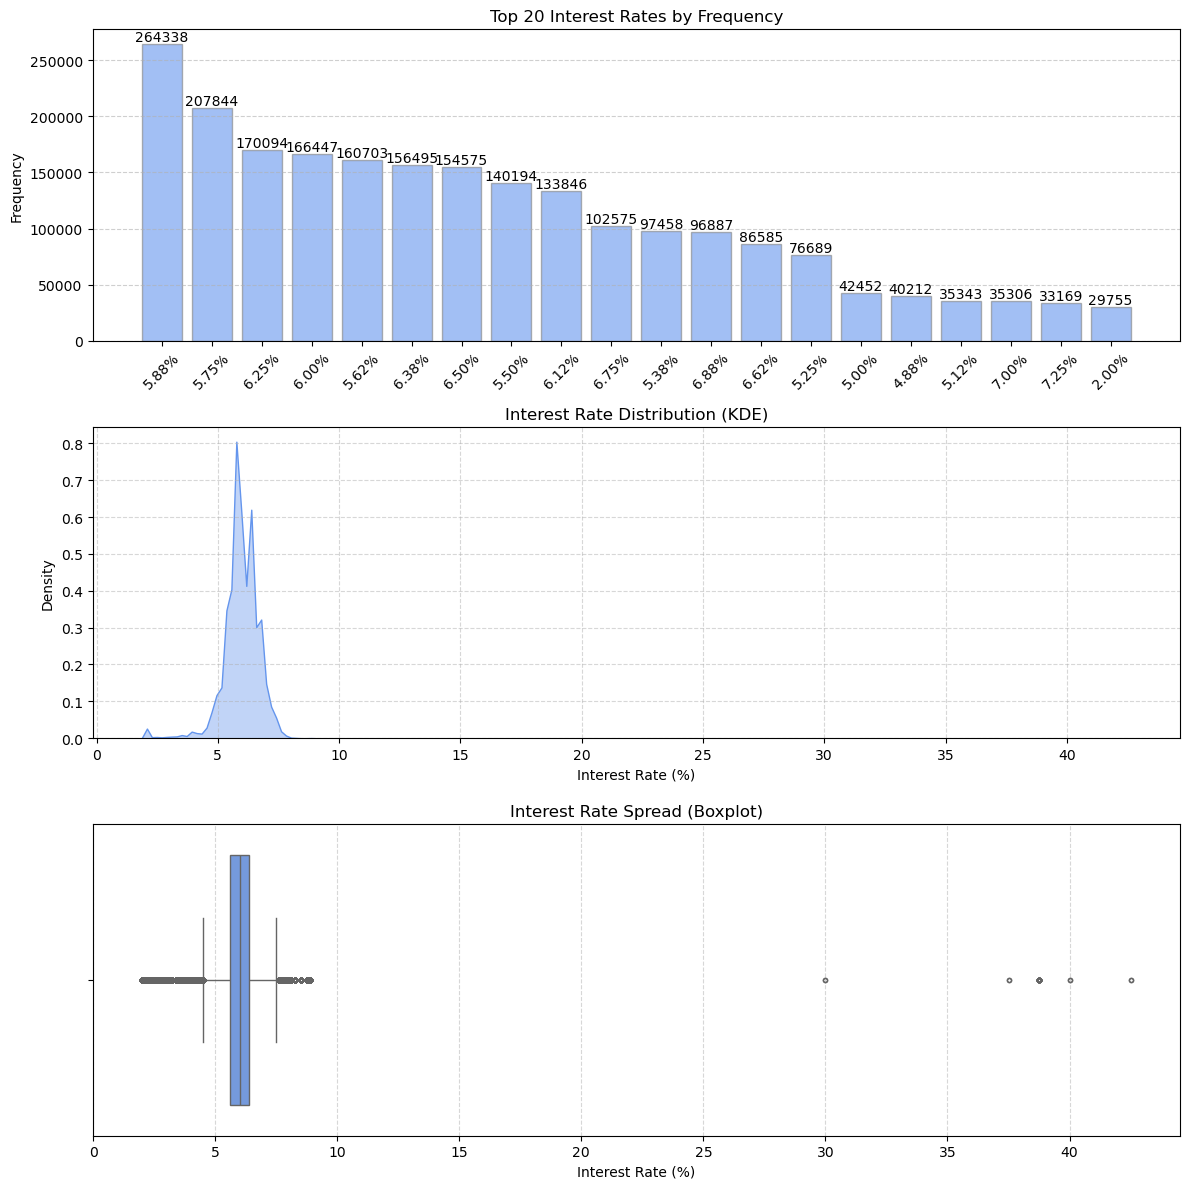

In [8]:
plot_top_interest_rates(
    data_2008,
    num_interest_rates=20,
    color='cornflowerblue',
    edge_color='gray',
    alpha=0.6,
    show_kde=True,
    show_boxplot=True
)


#### 1.2 Data of 2020

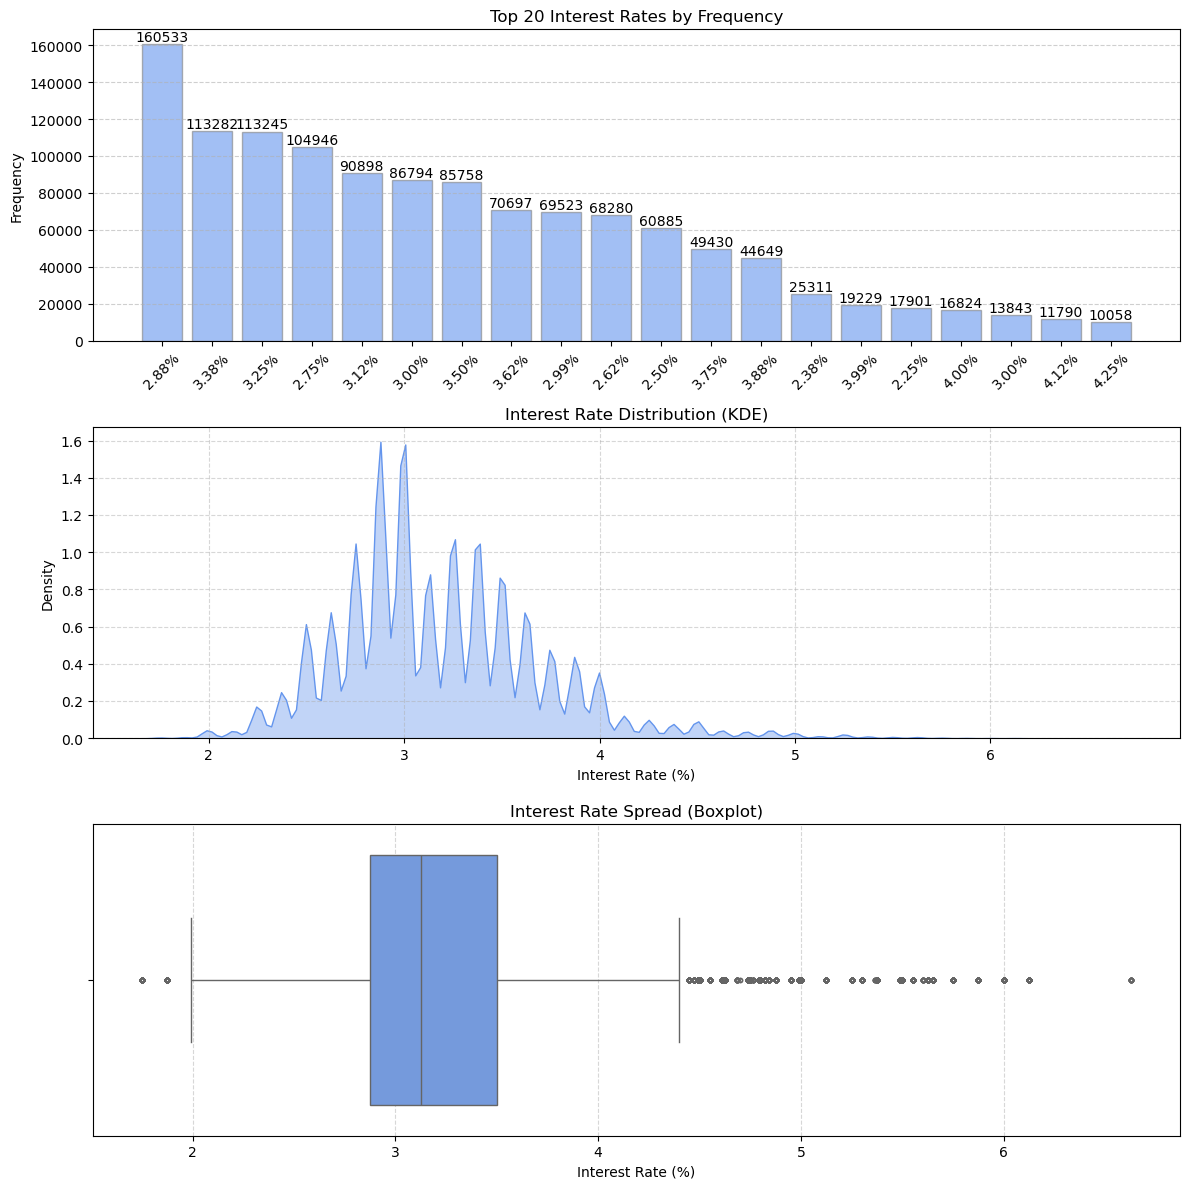

In [9]:
plot_top_interest_rates(
    data_2020,
    num_interest_rates=20,
    color='cornflowerblue',
    edge_color='gray',
    alpha=0.6,
    show_kde=True,
    show_boxplot=True
)


#### 1.3 Data of 2022

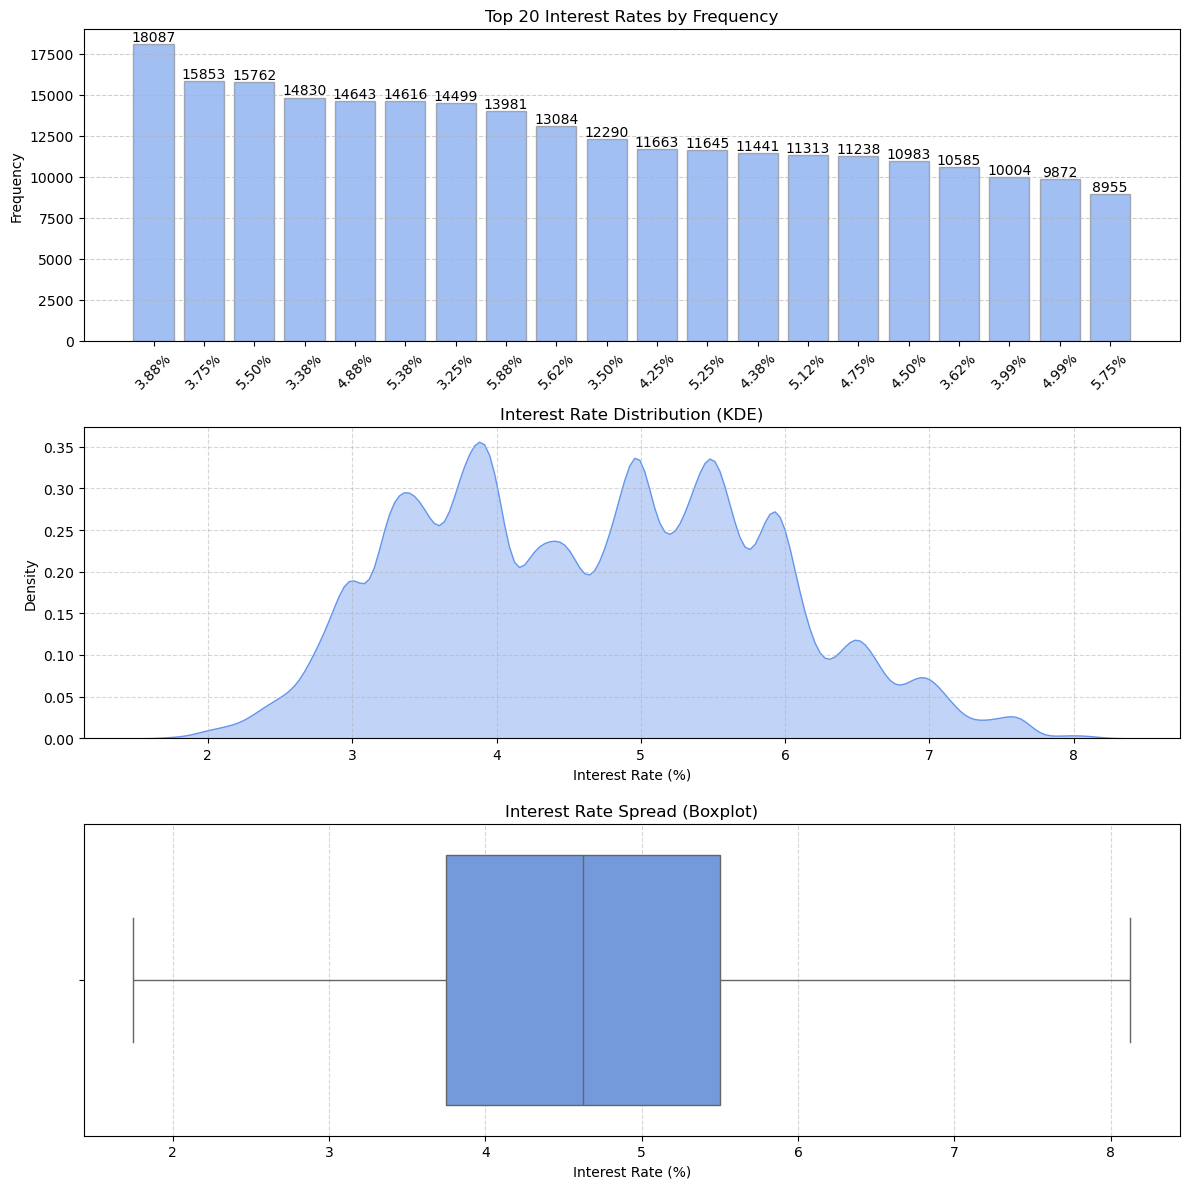

In [10]:
plot_top_interest_rates(
    data_2022,
    num_interest_rates=20,
    color='cornflowerblue',
    edge_color='gray',
    alpha=0.6,
    show_kde=True,
    show_boxplot=True
)


#### Summary

The histogram exhibits a declining trend for all three cases, with the highest frequency occurring at 5.875% in 2008, 2.875% in 2020, 3.875% in 2022. This reflects that in 2008 the interest rate is extremely high, due to real estate bubble occurred in the U.S. Then it falls back to 2-3% in 2020, which is a great year for economy and individuals. However, it grows to 3-5% in 2022 perhaps for the pandemic situation. 

### 3. Loan Age Analysis

Analyze the distribution of loan ages and create a histogram.

In [11]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

def plot_loan_age_distribution(data, num_tail_ages=15, bar_width=0.6,
                                use_histogram=True, show_median=True, show_mode=True,
                                color='skyblue', edge_color='black', alpha=0.7):
    """
    Plots the distribution of loan ages using either a histogram or a bar chart of the oldest ages.

    Parameters:
        data (pd.DataFrame): Data containing a 'Loan age' column.
        num_tail_ages (int): Number of oldest loan ages to show in tail plot (default: 15).
        bar_width (float): Width of bars in tail plot (default: 0.6).
        use_histogram (bool): If True, plots histogram; if False, plots tail distribution (default: True).
        show_median (bool): If True, shows median line or value (default: True).
        show_mode (bool): If True, shows mode line(s) or value(s) (default: True).
        color (str): Bar color (default: 'skyblue').
        edge_color (str): Edge color of bars (default: 'black').
        alpha (float): Transparency of bars (default: 0.7).

    Returns:
        None
    """
    
    # Step 1: Ensure numeric conversion
    data['Loan age'] = pd.to_numeric(data['Loan age'], errors='coerce')
    loan_age = data['Loan age'].dropna()

    # Step 2: Create plot
    plt.figure(figsize=(12, 6))

    if use_histogram:
        # ---- Histogram: full distribution with discrete bins ----
        bins = range(int(loan_age.min()), int(loan_age.max()) + 1)
        sns.histplot(loan_age, bins=bins, discrete=True, color=color, edgecolor=edge_color, alpha=alpha)

        plt.title('Loan Age Distribution (Histogram)')
        plt.xlabel('Loan Age (Months)')
        plt.ylabel('Frequency')

        # Median line
        if show_median:
            median_val = loan_age.median()
            plt.axvline(median_val, color='red', linestyle='--', label=f'Median: {median_val:.1f}')

        # Mode line(s)
        if show_mode:
            mode_vals = loan_age.mode()
            for i, mode_val in enumerate(mode_vals):
                plt.axvline(mode_val, color='green', linestyle=':', label=f'Mode: {mode_val:.0f}' if i == 0 else None)

        if show_median or show_mode:
            plt.legend()

    else:
        # ---- Tail: Bar chart of largest N loan ages ----
        loan_age_counts = loan_age.value_counts().sort_index()
        tail_loan_ages = loan_age_counts.tail(num_tail_ages)

        x_coords = np.arange(len(tail_loan_ages))
        plt.bar(x_coords, tail_loan_ages.values, width=bar_width,
                color=color, edgecolor=edge_color, alpha=alpha)

        plt.xticks(x_coords, tail_loan_ages.index, rotation=45, ha='center')
        plt.xlabel('Loan Age (Months)')
        plt.ylabel('Frequency')
        plt.title(f'Tail Distribution of Loan Ages (Top {num_tail_ages} Oldest)')

        # Count text
        for x, count in zip(x_coords, tail_loan_ages.values):
            plt.text(x, count + 5, str(int(count)), ha='center', va='bottom')

        # Show stats as text
        if show_median or show_mode:
            summary_text = ''
            if show_median:
                summary_text += f'Median: {loan_age.median():.1f}  '
            if show_mode:
                summary_text += f'Mode: {", ".join(map(str, loan_age.mode().astype(int)))}'
            plt.figtext(0.99, 0.01, summary_text.strip(), ha='right', fontsize=10, color='gray')

    plt.grid(axis='y', linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()


#### 1.1 Data of 2008

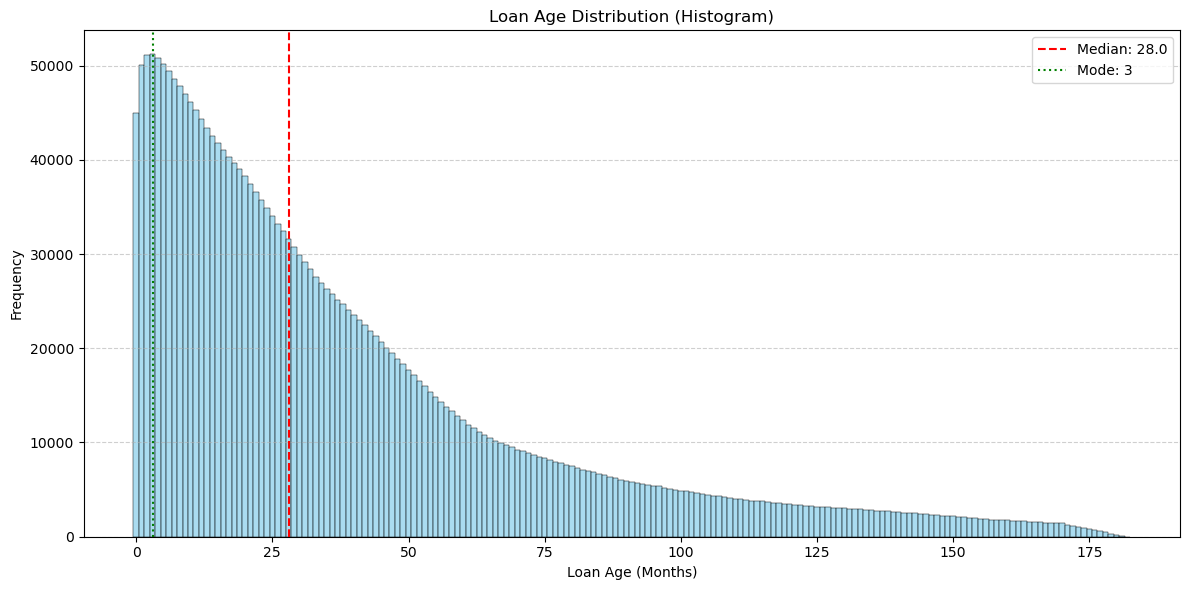

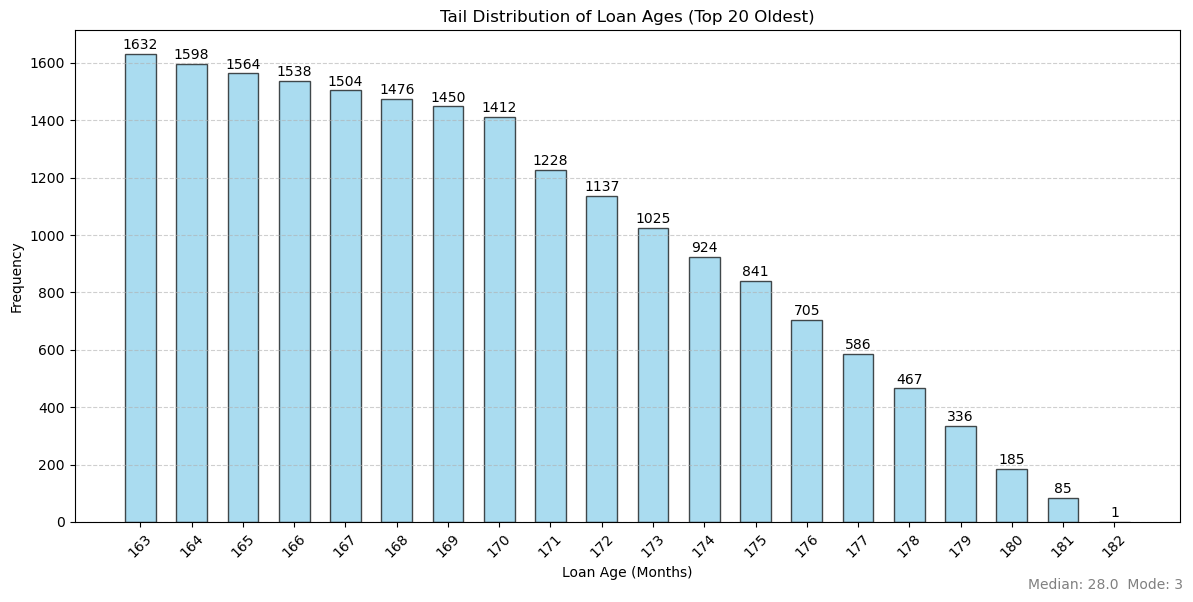

In [12]:
plot_loan_age_distribution(data_2008, use_histogram=True)
plot_loan_age_distribution(data_2008, use_histogram=False, num_tail_ages=20)


#### 1.2 Data of 2020

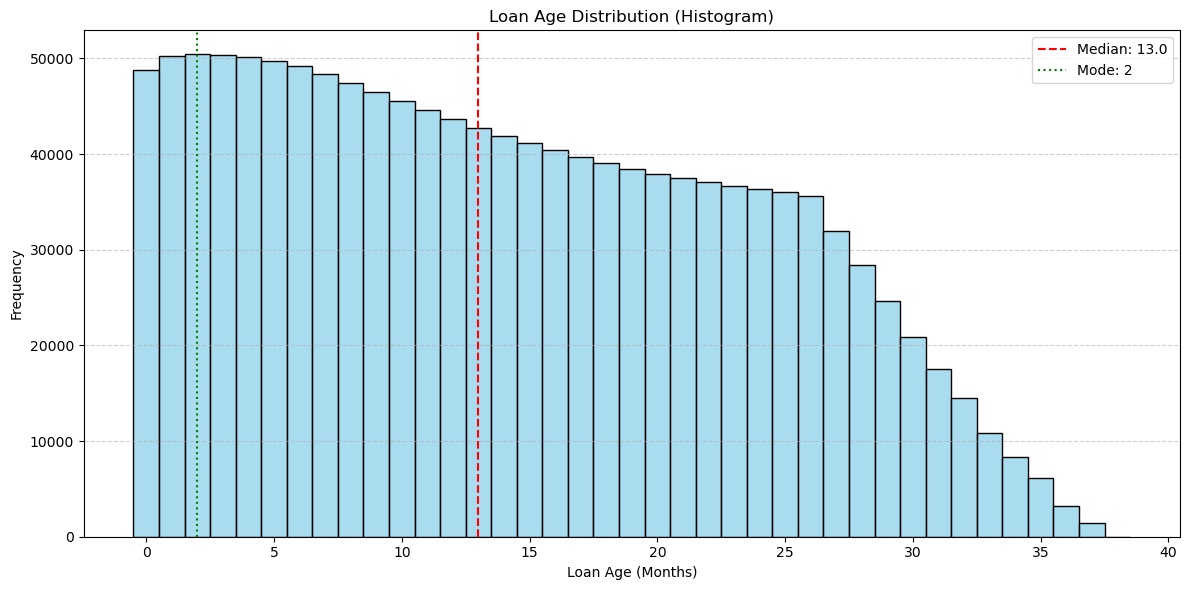

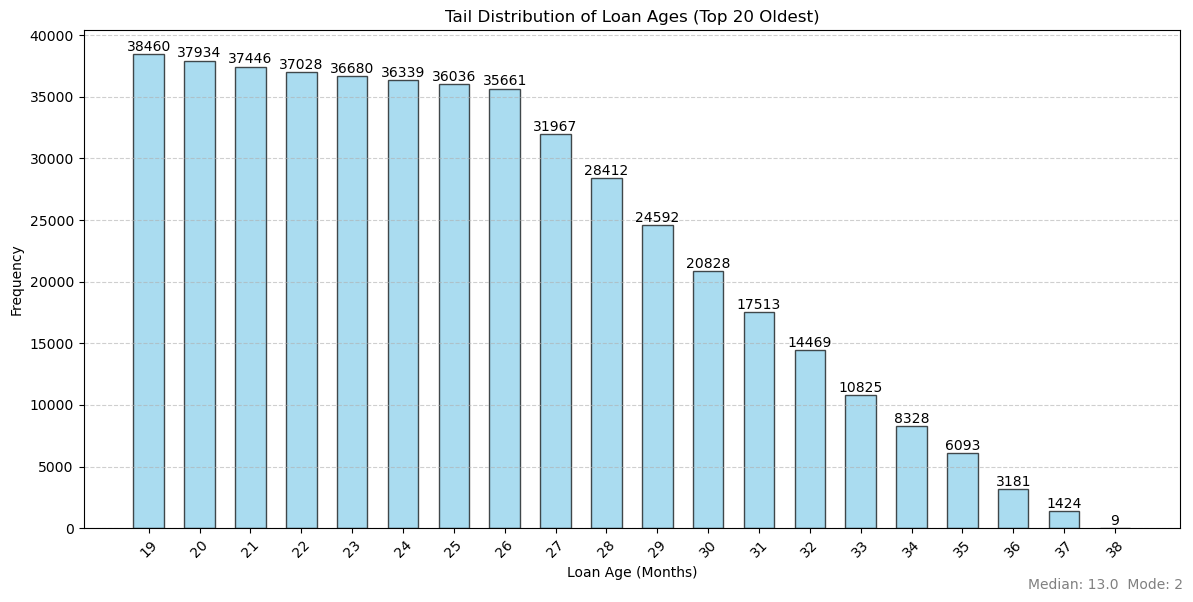

In [13]:
plot_loan_age_distribution(data_2020, use_histogram=True)
plot_loan_age_distribution(data_2020, use_histogram=False, num_tail_ages=20)


#### 1.3 Data of 2022

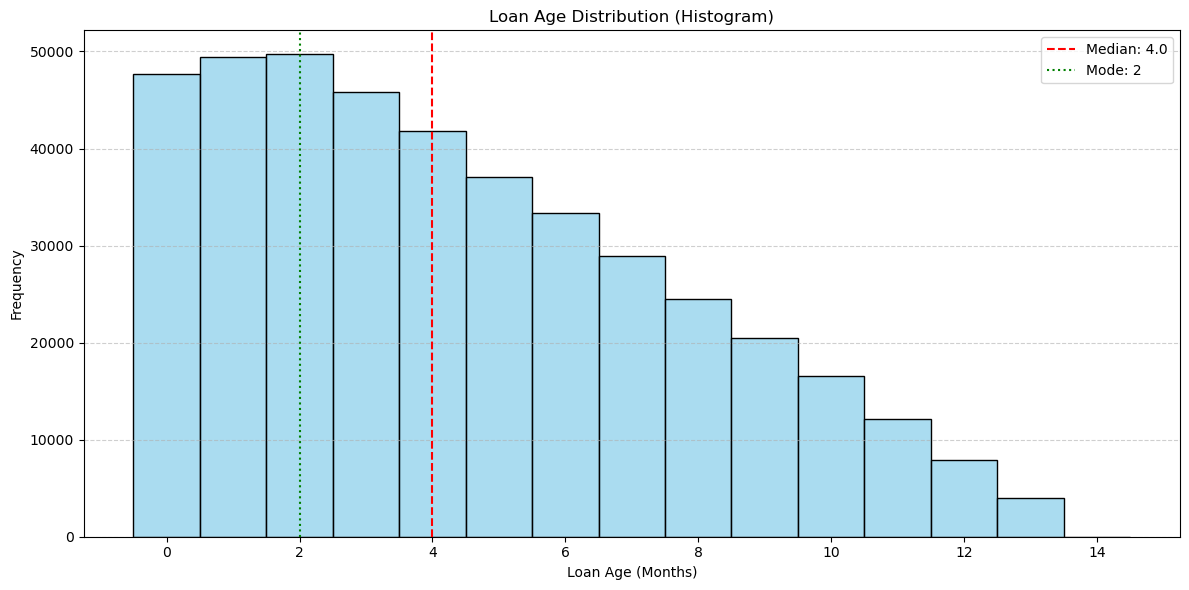

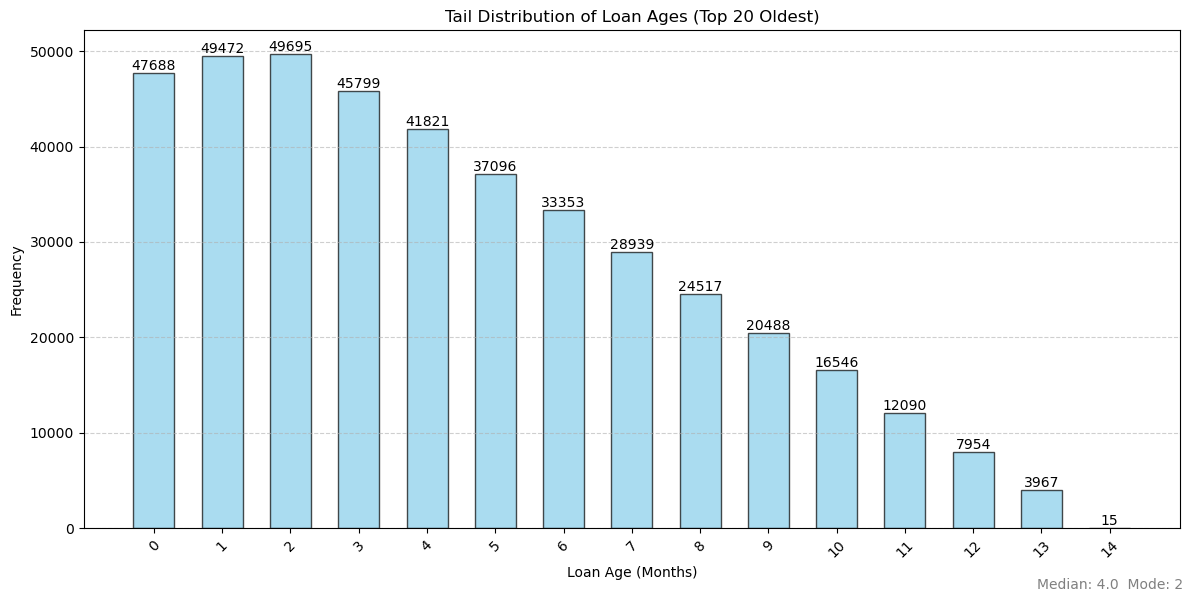

In [14]:
plot_loan_age_distribution(data_2022, use_histogram=True)
plot_loan_age_distribution(data_2022, use_histogram=False, num_tail_ages=20)


### 4. Loan to Value (LTV) Analysis

Analyze the estimated loan-to-value ratios and create a histogram or box plot.

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

def plot_all_ltv_distributions(data, exclude_999=True,
                               color_box='skyblue',
                               color_violin='lightgreen',
                               color_hist='cornflowerblue'):
    
    """
    Displays three types of distribution plots for Estimated Loan-to-Value (ELTV): 
    Boxplot, Violin Plot, and Histogram.

    Parameters:
        data (pd.DataFrame): DataFrame containing 'Estimated loan to value (eltv)' column.
        exclude_999 (bool): Whether to exclude LTV values equal to 999 (default: True).
        color_box (str): Color for the boxplot (default: 'skyblue').
        color_violin (str): Color for the violin plot (default: 'lightgreen').
        color_hist (str): Color for the histogram (default: 'cornflowerblue').

    Returns:
        None
    """


    # Clean LTV data
    data['Estimated loan to value (eltv)'] = pd.to_numeric(data['Estimated loan to value (eltv)'], errors='coerce')
    ltv = data['Estimated loan to value (eltv)']
    if exclude_999:
        ltv = ltv[ltv != 999]
    ltv = ltv.dropna()

    # Boxplot
    plt.figure(figsize=(10, 4))
    sns.boxplot(x=ltv, color=color_box)
    plt.title('Estimated LTV - Boxplot')
    plt.xlabel('Estimated Loan-to-Value')
    plt.grid(axis='x', linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()

    # Violin Plot
    plt.figure(figsize=(10, 4))
    sns.violinplot(x=ltv, color=color_violin)
    plt.title('Estimated LTV - Violin Plot')
    plt.xlabel('Estimated Loan-to-Value')
    plt.grid(axis='x', linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()

    # Histogram
    plt.figure(figsize=(10, 4))
    sns.histplot(ltv, bins=30, kde=False, color=color_hist, edgecolor='black', alpha=0.7)
    plt.title('Estimated LTV - Histogram')
    plt.xlabel('Estimated Loan-to-Value')
    plt.ylabel('Frequency')
    plt.grid(axis='y', linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()


#### 1.1 Data of 2008

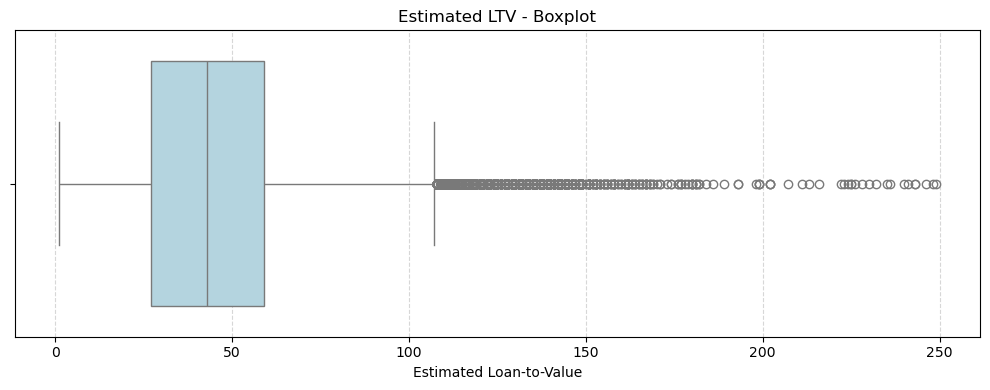

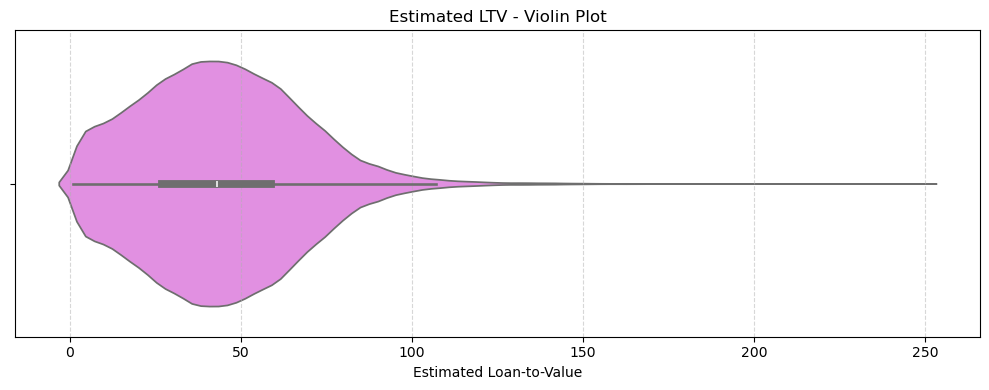

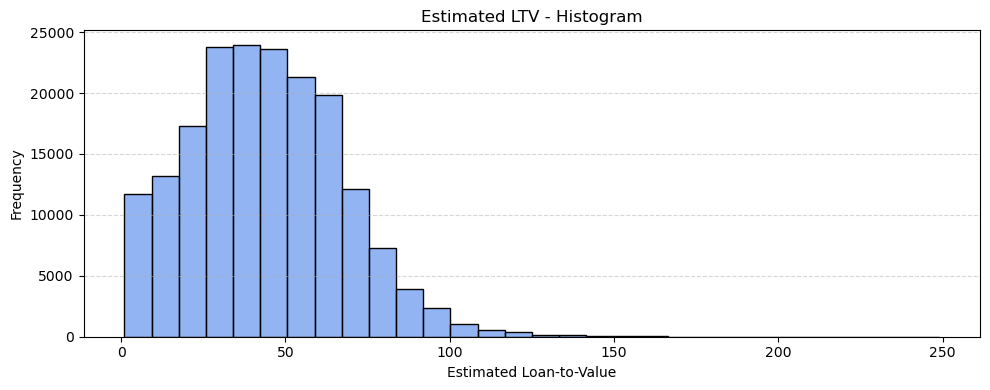

In [16]:
plot_all_ltv_distributions(data_2008, color_violin='violet', color_box='lightblue')


#### 1.2 Data of 2020

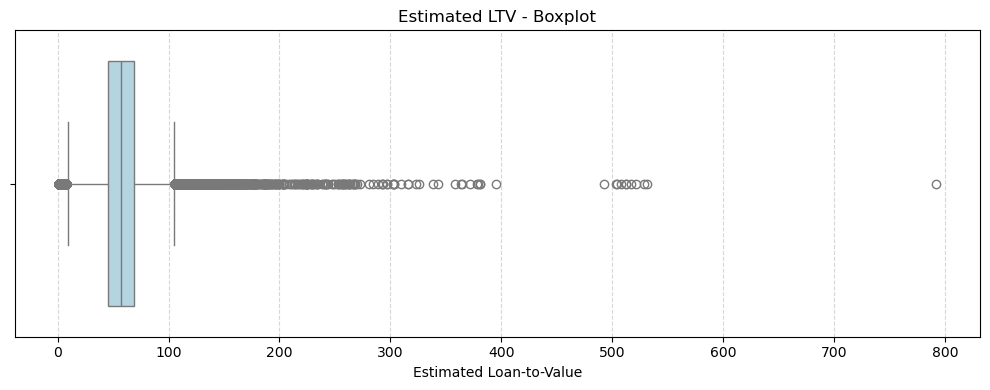

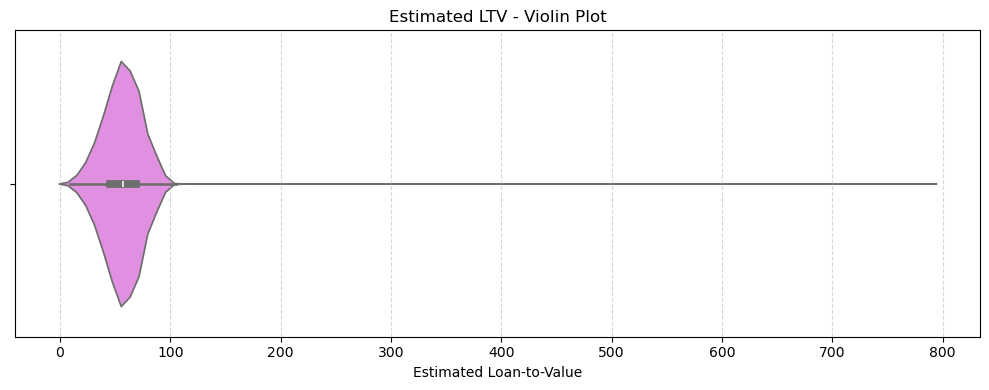

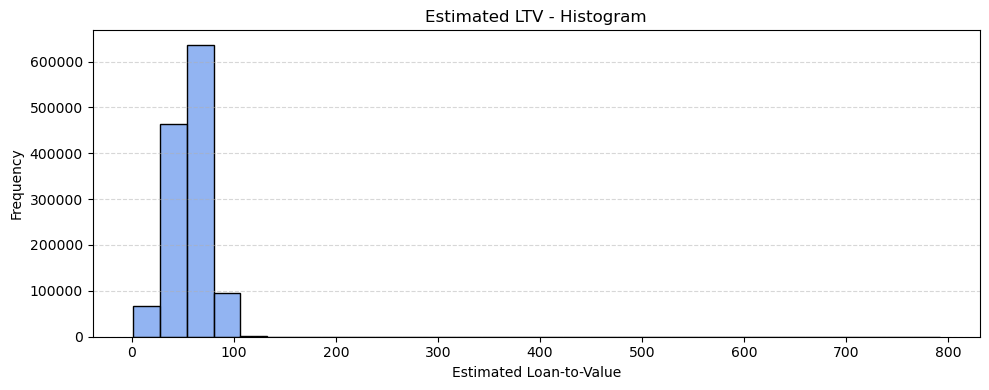

In [17]:
plot_all_ltv_distributions(data_2020, color_violin='violet', color_box='lightblue')


#### 1.3 Data of 2022

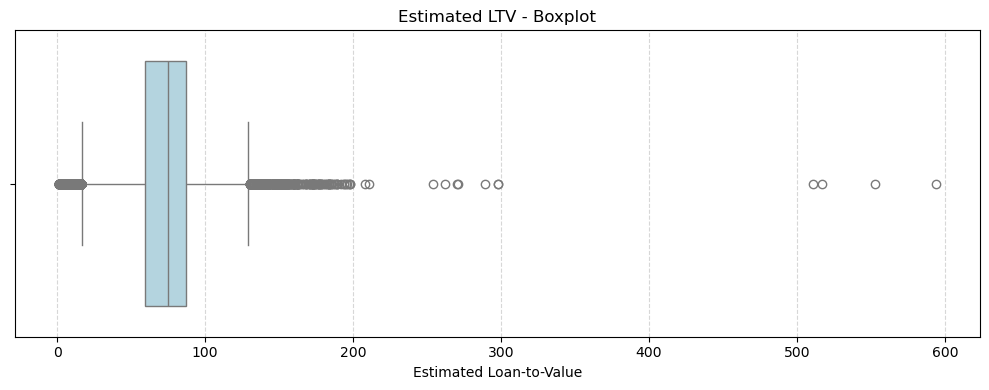

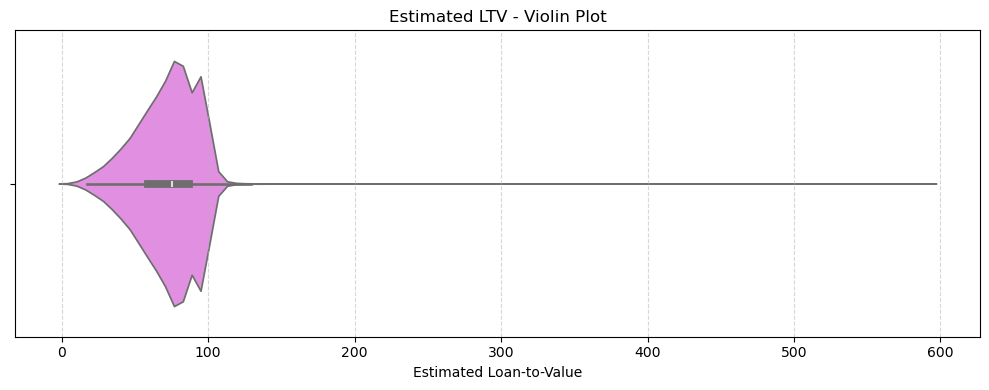

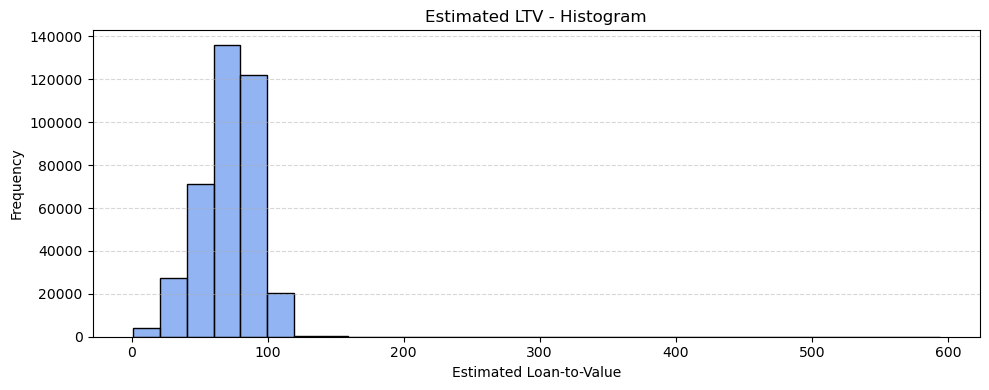

In [18]:
plot_all_ltv_distributions(data_2022, color_violin='violet', color_box='lightblue')


#### Summary

From the graphs of three cases, knowing the maximum frequency of estimated LTV in 2008 is about 45, in 2020 is about 60, and in 2022 is about 80. 

In 2008, the maximum frequency of estimated LTV around 45 suggests that a significant number of loans had an estimated LTV ratio of approximately 45. This could indicate that a substantial portion of borrowers in 2008 had a down payment of around 55% of the property value, and they borrowed the remaining 45%.

With same logic, borrowers in 2020 may have made a smaller down payment, covering approximately 40% of the property value, and borrowed the remaining 60%. Borrowers in 2022 may have made an even smaller down payment, covering approximately 20% of the property value, and borrowing the remaining 80%.

The increasing maximum frequency of estimated LTV ratios from 2008 to 2022 indicates a potential trend of borrowers making smaller down payments and borrowing a higher percentage of the property's value. This could reflect changing lending practices, economic conditions, or borrower preferences over the years. However, it's essential to consider other factors and conduct a more in-depth analysis to understand the full context and reasons behind these trends.

# Mortgage Rate

In [19]:
import requests
from bs4 import BeautifulSoup
from datetime import datetime

def get_mortgage_rates(url='https://www.mortgagenewsdaily.com/mortgage-rates'):
    """
    Fetches 30-year and 15-year fixed mortgage rates from Mortgage News Daily.
    Returns a dictionary with rates and fetch time.
    """
    try:
        response = requests.get(url, timeout=10)
        response.raise_for_status()  # Raise error for non-200 status codes

        soup = BeautifulSoup(response.text, 'html.parser')
        div_elements = soup.find_all('div', {'class': 'monthly-payment text-center'})

        extracted_rates = []
        for div_element in div_elements:
            data_calc_years = div_element.get('data-calc-years')
            if data_calc_years in ['30', '15']:
                rate = div_element.get('data-calc-rate')
                if rate:
                    extracted_rates.append((data_calc_years, rate))
            if len(extracted_rates) == 2:
                break

        # Structure output
        rates = {f"{yr} Yr": rate for yr, rate in extracted_rates}
        rates['timestamp'] = datetime.now().strftime('%Y-%m-%d %H:%M:%S')
        rates['source'] = url

        return rates if '30 Yr' in rates and '15 Yr' in rates else None

    except Exception as e:
        print(f"Error fetching mortgage rates: {e}")
        return None


rates = get_mortgage_rates()
if rates:
    print(f"[{rates['timestamp']}] Mortgage Rates from {rates['source']}:")
    print(f" - 30 Yr Fixed: {rates['30 Yr']}%")
    print(f" - 15 Yr Fixed: {rates['15 Yr']}%")
else:
    print("Failed to retrieve both 30 Yr and 15 Yr mortgage rates.")


[2025-07-29 16:01:34] Mortgage Rates from https://www.mortgagenewsdaily.com/mortgage-rates:
 - 30 Yr Fixed: 6.77%
 - 15 Yr Fixed: 6.03%


# Determine the individuals benefit

### Combine and Clean Data

In [1]:
import pandas as pd

# Monthly payment calculator (fixed-rate, equal principal + interest)
def monthly_payment(principal, annual_rate, months):
    r = annual_rate / 12 / 100
    return (r * principal) / (1 - (1 + r) ** -months) if r > 0 else principal / months

# Merge multiple annual datasets and return:
# 1) Full combined dataset
# 2) Filtered loans eligible for refinancing
def prepare_eligible_loans(*datasets, market_rate=6.79):
    """
    Combines datasets and identifies loans eligible for refinancing based on interest rate and term.

    Parameters:
        *datasets: One or more pandas DataFrames with loan data.
        market_rate (float): Current market interest rate for refinancing.

    Returns:
        tuple: (combined_df, eligible_df)
    """
    # Merge datasets
    combined_df = pd.concat(datasets, axis=0, ignore_index=True)
    combined_df.sort_values(by='Monthly reporting period', ascending=False, inplace=True)
    combined_df.drop_duplicates(subset='Loan sequence number', keep='first', inplace=True)
    combined_df.reset_index(drop=True, inplace=True)

    # Select and clean columns
    selected_columns = ['Loan sequence number', 'Current actual upb', 'Loan age',
                        'Remaining months to legal maturity', 'Current interest rate', 'Current month modification cost']
    new_df = combined_df[selected_columns].fillna(0)

    # Type conversions
    new_df['Loan age'] = new_df['Loan age'].astype(int)
    new_df['Remaining months to legal maturity'] = new_df['Remaining months to legal maturity'].astype(int)
    new_df['Current interest rate'] = new_df['Current interest rate'].astype(float)

    # Calculate original loan term
    new_df['Original term'] = new_df['Loan age'] + new_df['Remaining months to legal maturity']

    # Filter loans eligible for refinancing
    eligible_df = new_df[
        (new_df['Current interest rate'] > market_rate) &
        (new_df['Remaining months to legal maturity'] > 12)
    ].copy()

    return combined_df, eligible_df

# Calculate refinancing savings and breakeven point, and save results
def calculate_refinancing_savings(eligible_df, market_rate=6.79, refinance_cost=3000):
    """
    Calculates monthly savings and breakeven period for refinancing and exports results to CSV.

    Parameters:
        eligible_df (pd.DataFrame): Filtered DataFrame of eligible loans.
        market_rate (float): New refinancing interest rate.
        refinance_cost (float): Upfront cost of refinancing.

    Returns:
        pd.DataFrame: Updated eligible_df with savings calculations.
    """
    eligible_df['Current actual upb'] = eligible_df['Current actual upb'].astype(float)

    # Current monthly payment
    eligible_df['Current monthly payment'] = eligible_df.apply(
        lambda row: monthly_payment(row['Current actual upb'], row['Current interest rate'], row['Remaining months to legal maturity']),
        axis=1
    )

    # Refinanced monthly payment
    eligible_df['Refinanced monthly payment'] = eligible_df.apply(
        lambda row: monthly_payment(row['Current actual upb'], market_rate, row['Remaining months to legal maturity']),
        axis=1
    )

    # Calculate savings and breakeven point
    eligible_df['Monthly savings'] = eligible_df['Current monthly payment'] - eligible_df['Refinanced monthly payment']
    eligible_df['Breakeven point (months)'] = refinance_cost / eligible_df['Monthly savings']

    # Remove non-beneficial loans
    eligible_df = eligible_df[eligible_df['Monthly savings'] > 0].copy()

    # Export summary
    eligible_df[['Loan sequence number',
                 'Current interest rate',
                 'Refinanced monthly payment',
                 'Monthly savings',
                 'Breakeven point (months)']].to_csv("refinancing_candidates.csv", index=False)

    return eligible_df

# Query refinancing benefit for a specific loan
def query_loan_savings(eligible_df, loan_sequence_number):
    """
    Prints refinancing benefit details for a specific loan.

    Parameters:
        eligible_df (pd.DataFrame): DataFrame of loans with savings calculated.
        loan_sequence_number (str or int): Unique identifier for the loan.

    Returns:
        None
    """
    loan = eligible_df[eligible_df['Loan sequence number'] == loan_sequence_number]
    if loan.empty:
        print("❌ Loan not found or not eligible for refinancing.")
    else:
        breakeven = loan['Breakeven point (months)'].values[0]
        savings = loan['Monthly savings'].values[0]
        new_payment = loan['Refinanced monthly payment'].values[0]

        print(f"✅ Loan {loan_sequence_number} is beneficial for refinancing.")
        print(f"   • Monthly savings: ${savings:.2f}")
        print(f"   • Breakeven period: {breakeven:.1f} months")
        print(f"   • New estimated monthly payment: ${new_payment:.2f}")


NameError: name 'new_df' is not defined

In [21]:
combined_df, eligible_df = prepare_eligible_loans(data_2008, data_2020, data_2022)
eligible_df = calculate_refinancing_savings(eligible_df)

# Search for specific loan number
query_loan_savings(eligible_df, "F00012345678")

❌ Loan not found or not eligible for refinancing.


# Delinquency Risk Prediction

### Module 1: Data Cleaning & Target Variable Construction

In [22]:

import pandas as pd
from scipy.stats import zscore

def clean_loan_data_for_modeling(df):

    """
    Cleans and prepares loan data for modeling:
    - Selects relevant columns
    - Handles missing values
    - Converts data types
    - Removes outliers (Z-score > 3)

    Parameters:
        df (pd.DataFrame): Raw loan dataset.

    Returns:
        pd.DataFrame: Cleaned DataFrame ready for modeling.
    """
    
    selected_columns = [
        'Loan sequence number', 'Current loan delinquency status', 'Loan age',
        'Remaining months to legal maturity', 'Current interest rate',
        'Estimated loan to value (eltv)', 'Delinquent accrued interest',
        'Delinquency due to disaster', 'Borrower assistance status code',
        'Current month modification cost', 'Interest bearing upb'
    ]
    df_clean = df[selected_columns].copy()
    df_clean.drop_duplicates(inplace=True)

    numeric_cols = [
        'Loan age', 'Remaining months to legal maturity', 'Current interest rate',
        'Estimated loan to value (eltv)', 'Delinquent accrued interest',
        'Current month modification cost', 'Interest bearing upb'
    ]
    for col in numeric_cols:
        df_clean[col] = pd.to_numeric(df_clean[col], errors='coerce')
    df_clean[numeric_cols] = df_clean[numeric_cols].fillna(df_clean[numeric_cols].median())

    categorical_cols = ['Delinquency due to disaster', 'Borrower assistance status code']
    for col in categorical_cols:
        df_clean[col] = df_clean[col].fillna(df_clean[col].mode()[0])
        df_clean[col] = df_clean[col].astype(str)

    df_clean['Current loan delinquency status'] = df_clean['Current loan delinquency status'].replace('RA', 999)
    df_clean['Current loan delinquency status'] = pd.to_numeric(df_clean['Current loan delinquency status'], errors='coerce')
    df_clean['Current loan delinquency status'] = df_clean['Current loan delinquency status'].fillna(999).astype(int)
    df_clean['Loan sequence number'] = df_clean['Loan sequence number'].astype(str)

    z_scores = df_clean[numeric_cols].apply(zscore)
    df_clean = df_clean[(z_scores.abs() < 3).all(axis=1)]

    return df_clean


In [23]:

def classify_default(x):
    """
    Classifies loan default status.

    Returns 1 if the input indicates a default (RA or delinquency ≥ 5), 
    otherwise returns 0.

    Parameters:
        x: Loan delinquency status (str, int, or other)

    Returns:
        int: 1 for default, 0 for non-default
    """
    
    if str(x).strip().upper() == 'RA':
        return 1
    try:
        return 1 if int(x) >= 5 else 0
    except:
        return 0


### Module 2: Feature Preparation & Optional Scaling

In [24]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

def prepare_features(df, selected_features, scale=False):
    """
    Prepares feature matrix for modeling by selecting, encoding, and optionally scaling features.

    Parameters:
        df (pd.DataFrame): Input DataFrame.
        selected_features (list): List of column names to use as features.
        scale (bool): If True, standardizes features using z-score normalization.

    Returns:
        pd.DataFrame: Transformed feature matrix.
    """
    
    X = df[selected_features]
    X = pd.get_dummies(X, drop_first=True)
    if scale:
        scaler = StandardScaler()
        X_scaled = scaler.fit_transform(X)
        X = pd.DataFrame(X_scaled, columns=X.columns) 

    return X


### Module 3: Model Training Interface

In [25]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

def train_model(X_train, y_train, model_type='rf'):
    """
    Trains a classification model using the specified algorithm.

    Parameters:
        X_train (pd.DataFrame or np.ndarray): Feature matrix for training.
        y_train (pd.Series or np.ndarray): Target labels for training.
        model_type (str): Model type to use ('rf', 'lr', 'xgb', or 'lgb').

    Returns:
        Trained model object.

    Raises:
        ValueError: If an unsupported model_type is provided.
    """
    
    if model_type == 'rf':
        model = RandomForestClassifier(n_estimators=100, random_state=42)
    elif model_type == 'lr':
        model = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)
    elif model_type == 'xgb':
        model = XGBClassifier(eval_metric='logloss', random_state=42)
    elif model_type == 'lgb':
        model = LGBMClassifier(random_state=42)
    else:
        raise ValueError("Model type must be 'rf' or 'lr'")
    model.fit(X_train, y_train)
    return model


### Module 4: Model Evaluation (Classification Report, Confusion Matrix, ROC)

In [26]:

from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

def evaluate_model(model, X_test, y_test, model_name='Model'):
    """
    Evaluates a classification model using classification report, confusion matrix, and ROC curve.

    Parameters:
        model: Trained classification model with predict and predict_proba methods.
        X_test (pd.DataFrame or np.ndarray): Test feature data.
        y_test (pd.Series or np.ndarray): True labels for test data.
        model_name (str): Name of the model (used in plot titles and labels).

    Returns:
        None
    """

    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]

    print("Classification Report:")
    print(classification_report(y_test, y_pred, digits=4))

    conf_matrix = confusion_matrix(y_test, y_pred)
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Non-default', 'Default'],
                yticklabels=['Non-default', 'Default'])
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix - {model_name}")
    plt.show()

    fpr, tpr, _ = roc_curve(y_test, y_prob)
    auc_score = roc_auc_score(y_test, y_prob)
    plt.plot(fpr, tpr, label=f"{model_name} (AUC = {auc_score:.4f})", color='darkorange')
    plt.plot([0,1], [0,1], 'k--')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"ROC Curve - {model_name}")
    plt.legend()
    plt.grid(True)
    plt.show()


In [27]:

df_raw = combined_df

# Clean
df_clean = clean_loan_data_for_modeling(df_raw)
df_clean['default'] = df_clean['Current loan delinquency status'].apply(classify_default)

# Feature selection
selected_features = [
    'Loan age', 'Remaining months to legal maturity', 'Current interest rate',
    'Estimated loan to value (eltv)', 'Delinquent accrued interest',
    'Delinquency due to disaster', 'Borrower assistance status code',
    'Current month modification cost', 'Interest bearing upb'
]

# Prepare
scale = True  # Set to True for logistic regression
X = prepare_features(df_clean, selected_features, scale=scale)
y = df_clean['default']

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)


### Module 5: Feature Importance Visualization

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def show_feature_importance(model, X, model_type='rf'):
    """
    Displays and returns feature importance for a trained model.

    Parameters:
        model: Trained model (e.g., RandomForest, XGBoost, or LogisticRegression).
        X (pd.DataFrame or np.ndarray): Feature set used for training.
        model_type (str): Type of model ('rf', 'xgb', or 'lr').

    Returns:
        pd.DataFrame: Feature importance ranked in descending order.
    """

    if model_type == 'lr':
        importances = np.abs(model.coef_[0])
    else:  # rf or xgb
        importances = model.feature_importances_
    
    importance_df = pd.DataFrame({
        'Feature': X.columns if hasattr(X, 'columns') else [f'feat_{i}' for i in range(X.shape[1])],
        'Importance': importances
    }).sort_values(by='Importance', ascending=False)

    # Plot
    plt.figure(figsize=(10, 6))
    plt.barh(importance_df['Feature'], importance_df['Importance'], color='teal')
    plt.xlabel('Importance')
    plt.title(f'Feature Importance - {model_type.upper()}')
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()

    return importance_df.reset_index(drop=True)


### Module 6: Cross-Validation (F1 Score Reporting)

In [29]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import make_scorer, f1_score
import numpy as np

def run_cross_validation(model, X, y, cv=5):
    """
    Performs cross-validation using F1 score as the evaluation metric.

    Parameters:
        model: A scikit-learn compatible classifier.
        X (pd.DataFrame or np.ndarray): Feature matrix.
        y (pd.Series or np.ndarray): Target labels.
        cv (int): Number of cross-validation folds (default: 5).

    Returns:
        np.ndarray: Array of F1 scores from each fold.
    """
    
    scorer = make_scorer(f1_score, average='binary')
    kfold = StratifiedKFold(n_splits=cv, shuffle=True, random_state=42)
    scores = cross_val_score(model, X, y, cv=kfold, scoring=scorer)

    print(f"F1 score of each fold: {np.round(scores, 6)}")
    print(f"Average F1 score     : {np.mean(scores):.6f}")
    return scores


### Module 7: Full Pipeline Execution

Classification Report:
              precision    recall  f1-score   support

           0     0.9966    0.9993    0.9979     28371
           1     0.9275    0.7126    0.8060       341

    accuracy                         0.9959     28712
   macro avg     0.9620    0.8560    0.9020     28712
weighted avg     0.9957    0.9959    0.9957     28712



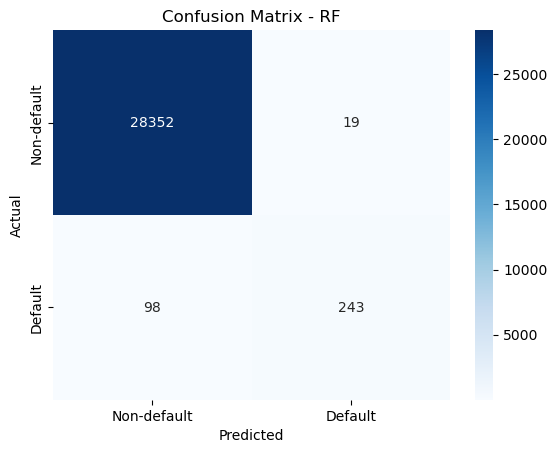

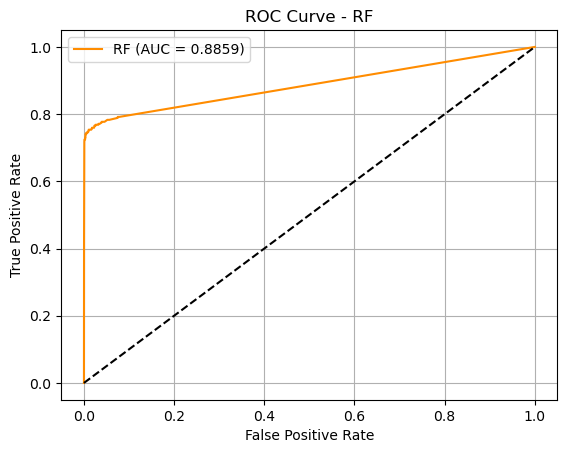

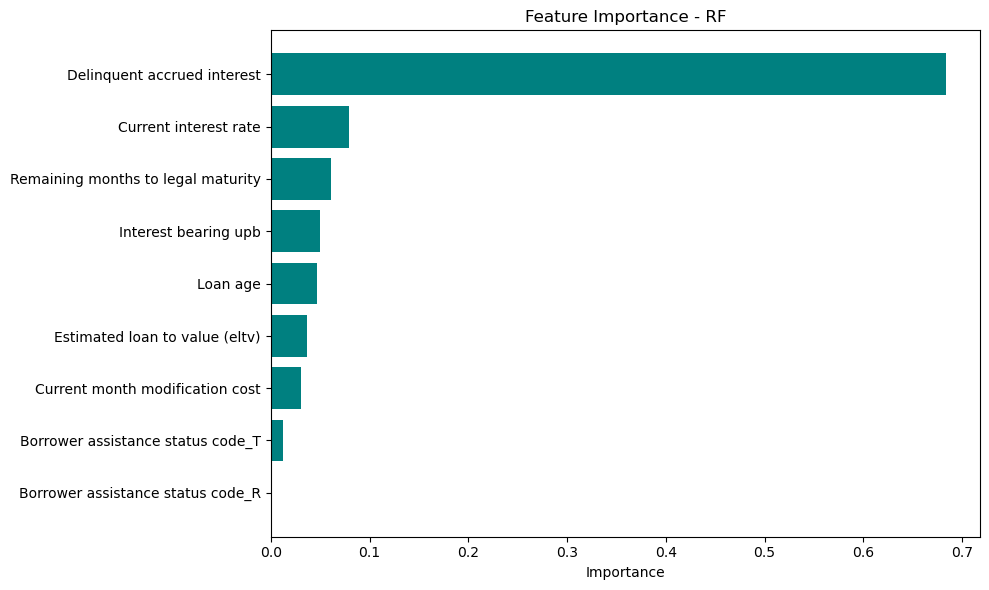

F1 score of each fold: [0.809524 0.797274 0.809444 0.817734 0.790541]
Average F1 score     : 0.804903


In [30]:
# Evaluation
model_type = 'rf'  # 'lr' 'rf' 'xgb' 'lgb'
model = train_model(X_train, y_train, model_type=model_type)
evaluate_model(model, X_test, y_test, model_name=model_type.upper())

importance_df = show_feature_importance(model, X_train, model_type=model_type)
cv_scores = run_cross_validation(model, X, y, cv=5)

### Module 8: Export Results to Excel

In [31]:

import pandas as pd
from sklearn.metrics import classification_report
from openpyxl import load_workbook
from openpyxl.drawing.image import Image as XLImage
import matplotlib.pyplot as plt

# 1️⃣ Convert classification report to DataFrame
def classification_report_to_df(y_true, y_pred):
    report_dict = classification_report(y_true, y_pred, output_dict=True)
    return pd.DataFrame(report_dict).T

# 2️⃣ Save matplotlib figure to PNG
def save_plot_as_image(fig, filename):
    fig.savefig(filename, bbox_inches='tight')
    plt.close(fig)  # avoid duplicate figures in notebook

# 3️⃣ Export everything to Excel
def export_results_to_excel(report_df, importance_df, cv_scores, image_paths, filename='model_output.xlsx'):
    # Step 1: Write DataFrames
    with pd.ExcelWriter(filename, engine='openpyxl') as writer:
        report_df.to_excel(writer, sheet_name='Classification Report')
        importance_df.to_excel(writer, sheet_name='Feature Importance')
        pd.DataFrame({'F1 per Fold': cv_scores}).to_excel(writer, sheet_name='Cross Validation')

    # Step 2: Re-open Excel to add images
    wb = load_workbook(filename)
    for sheet_name, img_path in image_paths.items():
        if sheet_name not in wb.sheetnames:
            wb.create_sheet(title=sheet_name)
        ws = wb[sheet_name]
        img = XLImage(img_path)
        img.width, img.height = 640, 400
        ws.add_image(img, 'A1')
    wb.save(filename)


In [32]:
# Generate classification report
y_pred = model.predict(X_test)
report_df = classification_report_to_df(y_test, y_pred)

# Save confusion matrix plot
fig_cm = plt.figure()
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="Blues")
plt.title("Confusion Matrix")
save_plot_as_image(fig_cm, "conf_matrix.png")

# Save ROC curve plot
fig_roc = plt.figure()
fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
plt.plot(fpr, tpr, label="ROC")
plt.plot([0, 1], [0, 1], 'k--')
plt.title("ROC Curve")
save_plot_as_image(fig_roc, "roc_curve.png")

# Export to Excel
export_results_to_excel(
    report_df=report_df,
    importance_df=importance_df,
    cv_scores=cv_scores,
    image_paths={
        "Confusion Matrix": "conf_matrix.png",
        "ROC Curve": "roc_curve.png"
    },
    filename="final_model_output.xlsx"
)


# User Interface

In [33]:
!pip install ipywidgets matplotlib

In [34]:
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider, IntSlider, Button, Output, Checkbox
from IPython.display import display, Markdown
import datetime

# Function to calculate monthly payment using amortization formula
def monthly_payment(principal, annual_rate, months):
    r = annual_rate / 12 / 100
    return (r * principal) / (1 - (1 + r) ** -months) if r > 0 else principal / months

# Output widget for export button
output = Output()

# Main function with export and breakeven in months + years
def breakeven_months_ui(current_upb, current_rate, new_rate, remaining_months, refinance_cost, export_results):
    """
    Calculates and visualizes the breakeven point for refinancing a loan.

    Displays monthly savings, breakeven period (in months and years), and an optional savings plot.
    Optionally exports the results to a Markdown file.

    Parameters:
        current_upb (float): Current unpaid principal balance.
        current_rate (float): Current loan interest rate (annual, in %).
        new_rate (float): New refinancing interest rate (annual, in %).
        remaining_months (int): Remaining loan term in months.
        refinance_cost (float): Upfront cost to refinance.
        export_results (bool): If True, saves the summary to a Markdown file.

    Returns:
        None
    """
    
    with output:
        output.clear_output()
        current_payment = monthly_payment(current_upb, current_rate, remaining_months)
        new_payment = monthly_payment(current_upb, new_rate, remaining_months)
        monthly_savings = current_payment - new_payment

        if monthly_savings <= 0:
            display(Markdown("❌ **Refinancing is not beneficial** (no savings)."))
            return

        breakeven = refinance_cost / monthly_savings
        breakeven_years = breakeven / 12

        # Result summary text
        summary = f"""
### ✅ Refinancing Summary

- **Current Monthly Payment:** ${current_payment:.2f}  
- **New Monthly Payment:** ${new_payment:.2f}  
- **Monthly Savings:** ${monthly_savings:.2f}  
- **Breakeven Period:** **{breakeven:.1f} months (~{breakeven_years:.2f} years)**
"""

        display(Markdown(summary))

        # Optional: Visualize cumulative savings vs refinance cost
        months = list(range(0, min(remaining_months, 60)))
        cumulative_savings = [monthly_savings * m for m in months]
        cost_line = [refinance_cost for _ in months]

        fig = plt.figure(figsize=(10, 5))
        plt.plot(months, cumulative_savings, label="Cumulative Savings")
        plt.plot(months, cost_line, '--', label="Refinance Cost", color='red')
        plt.xlabel("Months")
        plt.ylabel("Dollars")
        plt.title("Breakeven Analysis for Refinancing")
        plt.legend()
        plt.grid(True)
        plt.show()

        # Optional export
        if export_results:
            timestamp = datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
            filename = f"refinance_summary_{timestamp}.md"
            with open(filename, "w") as f:
                f.write("# Refinance Breakeven Summary\n")
                f.write(summary.replace("**", "").replace("### ", ""))
            print(f"📁 Results exported to: `{filename}`")

# Widgets
interact(
    breakeven_months_ui,
    current_upb=FloatSlider(value=200000, min=50000, max=1000000, step=10000, description='Current UPB'),
    current_rate=FloatSlider(value=7.0, min=1.0, max=15.0, step=0.1, description='Current Rate %'),
    new_rate=FloatSlider(value=6.0, min=1.0, max=15.0, step=0.1, description='New Rate %'),
    remaining_months=IntSlider(value=300, min=12, max=360, step=12, description='Remaining Months'),
    refinance_cost=FloatSlider(value=3000, min=500, max=10000, step=500, description='Refi Cost ($)'),
    export_results=Checkbox(value=False, description='📤 Export to File')
)

display(output)


interactive(children=(FloatSlider(value=200000.0, description='Current UPB', max=1000000.0, min=50000.0, step=…

Output()